In [ ]:
!pip install scikit-learn
!pip install tensorflow-macos
!pip install seaborn

In [49]:
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from bidict import bidict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ENCODER = bidict({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 
    'Y': 25, 'Z': 26})

In [36]:
labels = np.load("../data/labels.npy")
images = np.load("../data/images.npy")

### Data Preprocessing

In [37]:
labels = np.array([ENCODER[char] for char in labels])
images = images.astype("float") / 255

In [38]:
# plt.figure(figsize=(2,2))
# plt.grid(False)
# plt.imshow(images[100])

In [39]:
images = np.expand_dims(images, -1)
images.shape

(260, 50, 50, 1)

In [40]:
labels, images = shuffle(labels, images)
split = 0.8

labels_train = labels[:int(len(labels)*split)]
labels_test = labels[int(len(labels)*split):]

images_train = images[:int(len(images)*split)]
images_test = images[int(len(images)*split):]

In [42]:
labels_train.shape

(208,)

### Modelling & Training

In [43]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    keras.layers.Conv2D(32, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(len(ENCODER)+1, activation="softmax")
])

In [44]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
    optimizer=optimizer,
    metrics=["accuracy"])

In [45]:
model.fit(images_train, labels_train, batch_size=batch_size, epochs=epochs,
    validation_data=(images_test, labels_test), callbacks=early_stopping)

Epoch 1/20


2022-12-09 16:49:49.744130: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13/13 [==============================] - 1s 33ms/step - loss: 3.1309 - accuracy: 0.1779 - val_loss: 2.7993 - val_accuracy: 0.3462
Epoch 2/20
13/13 [==============================] - 0s 12ms/step - loss: 1.6269 - accuracy: 0.7163 - val_loss: 0.8084 - val_accuracy: 0.8269
Epoch 3/20
13/13 [==============================] - 0s 12ms/step - loss: 0.2992 - accuracy: 0.9231 - val_loss: 0.2935 - val_accuracy: 0.8654
Epoch 4/20
13/13 [==============================] - 0s 12ms/step - loss: 0.1456 - accuracy: 0.9423 - val_loss: 0.2505 - val_accuracy: 0.9231
Epoch 5/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0807 - accuracy: 0.9712 - val_loss: 0.2813 - val_accuracy: 0.8846
Epoch 6/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0697 - accuracy: 0.9760 - val_loss: 0.1669 - val_accuracy: 0.9231


### Inference

In [51]:
labels_pred = np.argmax(model.predict(images_test), axis=-1)

2/2 [==============================] - 0s 6ms/step


<AxesSubplot: >

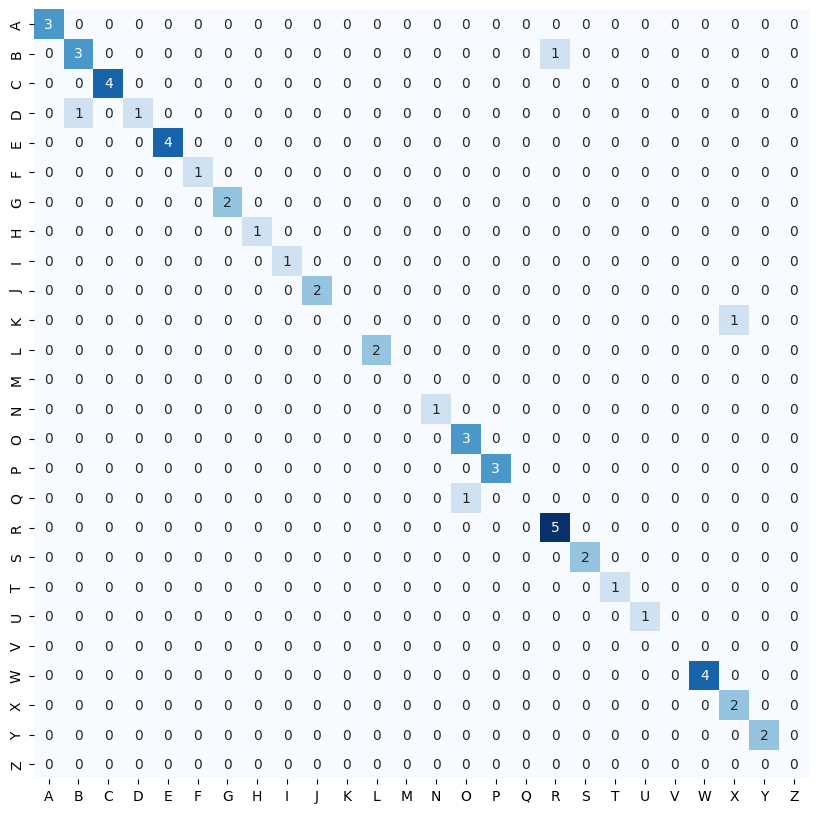

In [58]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", 
    xticklabels=list(ENCODER.keys()),
    yticklabels=list(ENCODER.keys()))

### Save and load model

In [62]:
model.save("../model/CNN")

INFO:tensorflow:Assets written to: ../model/CNN/assets


INFO:tensorflow:Assets written to: ../model/CNN/assets


In [63]:
keras.models.load_model("../model/CNN").summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0